In [1]:
# IMPORTS

import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IMREADS

car_image = cv2.imread('DATA/skodas.png')

In [3]:
# DISPLAY FUNCTION

def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    con_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(con_img)

# display(car_image)

In [4]:
# Loading the CASCADE FILES 

plate_cascades = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

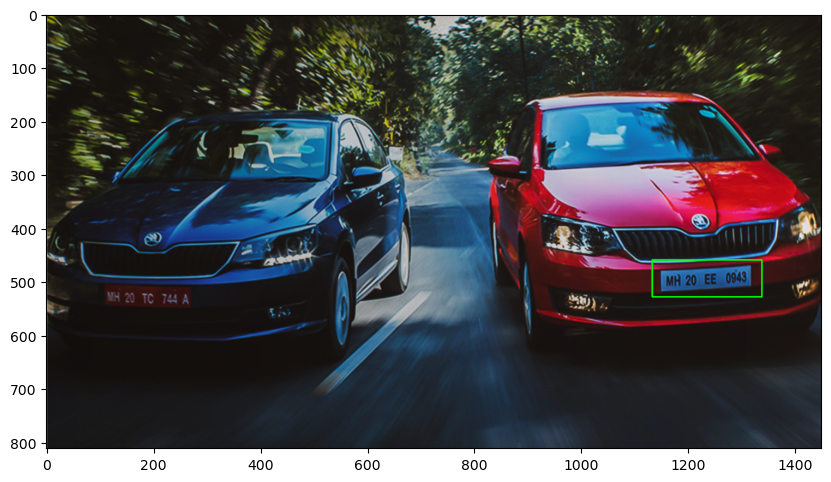

In [5]:
# Creating a function to detect the license plate

def detect_license_plate(img):
    plate_img = img.copy()
    # Detecting the license plate
    detected_plate = plate_cascades.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in detected_plate:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,255,0),2)
        return(plate_img)

car_plate_detected_image = detect_license_plate(car_image)
display(car_plate_detected_image)

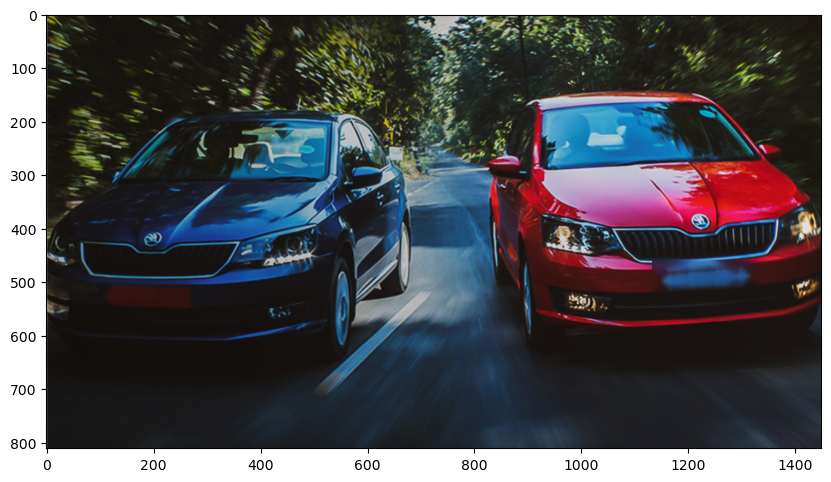

In [6]:
def blur_plate(img):
    plate_img = img.copy()
    detect_plate = plate_cascades.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in detect_plate:
        roi = plate_img[y:y+h, x:x+w]
        blur_part = cv2.medianBlur(roi, 35)
        plate_img[y:y+h, x:x+w] = blur_part
    return plate_img  # Move return outside the loop

plate_blurred_image = blur_plate(car_image)
display(plate_blurred_image)